In [1]:
# standard packages used to handle files
import sys
import os 
import glob
import time

# commonly used library for data manipulation
import pandas as pd

# numerical
import numpy as np

# handle images - opencv
import cv2

# machine learning library
import sklearn
import sklearn.preprocessing

# used to serialize python objects to disk and load them back to memory
import pickle

# plotting
import matplotlib.pyplot as plt

# helper functions
import helpers

# specific helper functions for feature extraction
import features

from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB


from sklearn.metrics import log_loss

from sklearn.metrics import confusion_matrix
import pylab as pl

# tell matplotlib that we plot in a notebook
%matplotlib notebook

%matplotlib inline

In [2]:
# filepath constants, set these according to your workflow:

# where are your datasets:
dataset_path = './images/'
# where do you want to save your features and other outputs:
output_path = './output/'

In [3]:
# you don't have to change the paths here:

dataset_path_train = os.path.join(dataset_path, 'train')
dataset_path_test = os.path.join(dataset_path, 'test')

features_path = os.path.join(output_path, 'features')
features_path_train = os.path.join(features_path, 'train')
features_path_test = os.path.join(features_path, 'test')

prediction_path = os.path.join(output_path, 'predictions')

# filepatterns to write out features
filepattern_descriptor_train = os.path.join(features_path_train, 'train_features_{}.pkl')
filepattern_descriptor_test = os.path.join(features_path_test, 'test_features_{}.pkl')

# create paths in case they don't exist:
helpers.createPath(features_path)
helpers.createPath(features_path_train)
helpers.createPath(features_path_test)
helpers.createPath(prediction_path)

In [4]:
folder_paths = glob.glob(os.path.join(dataset_path_train,'*'))
label_strings = np.sort(np.array([os.path.basename(path) for path in folder_paths]))
num_classes = label_strings.shape[0]

print("Amount of classes: ", num_classes)
print("\nLabels: \n", label_strings)

Amount of classes:  12

Labels: 
 ['chicken' 'elephant' 'fox' 'german_shepherd' 'golden_retriever' 'horse'
 'jaguar' 'lion' 'owl' 'parrot' 'swan' 'tiger']


In [5]:
train_paths = dict((label_string, helpers.getImgPaths(os.path.join(dataset_path_train, label_string))) 
                   for label_string in label_strings)

test_paths = helpers.getImgPaths(dataset_path_test)

In [6]:
def evaluate_models(X_train, X_valid, ytrain, yvalid, descriptor_desired):
    
    
    print('\n')
    
    #### SVM with rbf (defualt)####
    
    print(f" SVM ".center(40,'*'))

    # define support vector classifier
    model = SVC(probability=True, random_state=42)

    # fit model
    model.fit(X_train, ytrain)
    
    display_metrics(X_train, X_valid, ytrain, yvalid, descriptor_desired, model,"SVM with kernel rbf (default)")
    
    #### SVM with linear####
    
    print(f" SVM ".center(40,'*'))

    # define support vector classifier
    model = SVC(kernel='linear',probability=True, random_state=42)

    # fit model
    model.fit(X_train, ytrain)
    
    display_metrics(X_train, X_valid, ytrain, yvalid, descriptor_desired, model,"SVM with kernel linear")
    
    
    #### SVM with poly ####
    
    print(f" SVM ".center(40,'*'))

    # define support vector classifier
    model = SVC(kernel='poly',probability=True, random_state=42)

    # fit model
    model.fit(X_train, ytrain)
    
    display_metrics(X_train, X_valid, ytrain, yvalid, descriptor_desired, model,"SVM with kernel poly")
    
    #### SVM with sigmoid ####
    
    print(f" SVM ".center(40,'*'))

    # define support vector classifier
    model = SVC(kernel='sigmoid',probability=True, random_state=42)

    # fit model
    model.fit(X_train, ytrain)
    
    display_metrics(X_train, X_valid, ytrain, yvalid, descriptor_desired, model,"SVM with kernel sigmoid")
    
    
    #### SVM with precomputed ####
    
    print(f" SVM ".center(40,'*'))

    # define support vector classifier
    model = SVC(kernel='precomputed',probability=True, random_state=42)

    # fit model
    model.fit(X_train, ytrain)
    
    display_metrics(X_train, X_valid, ytrain, yvalid, descriptor_desired, model,"SVM with kernel precomputed")
    
    
    
    
    
    
    
    

In [7]:
def display_metrics(X_train, X_valid, ytrain, yvalid, descriptor_desired, model, model_name):
    print(f'\nclassification accuracy for {model_name} ({descriptor_desired}): ' +repr(model.score(X_valid,yvalid)))
    print(f'training accuracy for {model_name} ({descriptor_desired}): ' +repr(model.score(X_train,ytrain))+"\n")


    #get confusion matrix
    predictions_abs = model.predict(X_valid)
    cm = confusion_matrix(yvalid, predictions_abs)

    #display matrix
    print(cm)


    # plot confusion matrix
    pl.matshow(cm)
    pl.title(f'Confusion matrix for {model_name} ({descriptor_desired})')
    pl.colorbar()
    pl.ylabel('True class label')
    pl.xlabel('Predicted class label')
    pl.show()   

    predictions_proba = model.predict_proba(X_valid)
    ll = log_loss(yvalid, predictions_proba)
    print('\n\nAverage Log Loss for ',model_name,' (', descriptor_desired, '): %.3f' %ll)

    print('\n')

In [8]:
descriptors = ['daisy']

###################################  daisy  ####################################
Number of encoded train images: 4042
training took 528.6960740089417 seconds

Number of images for training : 3233
Number of images for validation : 809


***************** SVM ******************

classification accuracy for SVM with kernel rbf (default) (daisy): 0.49938195302843014
training accuracy for SVM with kernel rbf (default) (daisy): 0.9217445097432725

[[89 20  0  6  0 12  0  0  0  4  0  0]
 [15 27  1  2  0 29  0  2  0  0  1  0]
 [ 0  2  8 10  0  2  0 11  7  7  1  7]
 [13  5  1 31  0 15  0 11  3 11  3  2]
 [ 4  0  0 10  0  2  0  0  0  4  2  0]
 [13 18  0  1  0 58  0  0  0  0  0  0]
 [ 1  0  0  2  0  0  2  2  1  0  0  4]
 [ 1  1  2  8  0  0  0 59  2  3  0  9]
 [ 1  0  0  5  0  1  0  7 17 13  1  7]
 [ 1  0  3  2  0  1  0  5  8 46  2  5]
 [ 1  0  0  1  0  1  0  0  1 14 23  2]
 [ 2  0  1  1  0  2  0 12  4  8  0 44]]


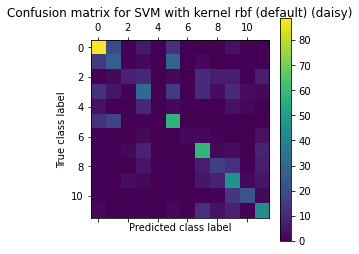



Average Log Loss for  SVM with kernel rbf (default)  ( daisy ): 1.405


***************** SVM ******************

classification accuracy for SVM with kernel linear (daisy): 0.5216316440049443
training accuracy for SVM with kernel linear (daisy): 0.7986390349520569

[[88 20  1  8  0 11  0  0  0  3  0  0]
 [ 9 36  1  5  0 23  0  2  0  0  1  0]
 [ 0  2 10 10  0  2  0 13  4 10  1  3]
 [13  5  1 30  0 14  0 11  3 12  4  2]
 [ 3  0  1 10  0  2  0  1  0  3  2  0]
 [15 21  0  3  0 50  0  0  1  0  0  0]
 [ 1  0  1  1  0  0  3  1  2  0  0  3]
 [ 2  1  3  4  0  0  0 62  0  4  0  9]
 [ 0  0  1  4  0  0  1  8 22 10  1  5]
 [ 0  0  3  5  0  0  0  5 12 46  2  0]
 [ 0  0  0  1  0  1  0  0  3  8 29  1]
 [ 2  0  2  2  0  2  0 10  3  7  0 46]]


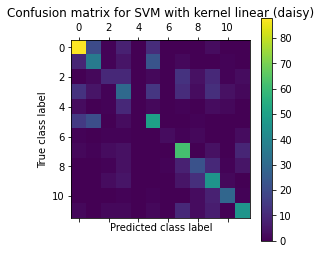



Average Log Loss for  SVM with kernel linear  ( daisy ): 1.370


***************** SVM ******************

classification accuracy for SVM with kernel poly (daisy): 0.453646477132262
training accuracy for SVM with kernel poly (daisy): 0.9913393133312712

[[78  7  1  7  0 35  0  0  0  3  0  0]
 [15 22  0  2  0 36  0  2  0  0  0  0]
 [ 4  2  7 12  0  3  0 11  5  4  1  6]
 [15  2  1 28  0 21  0 10  4  9  2  3]
 [ 7  0  0  7  0  4  0  0  0  4  0  0]
 [16 14  0  0  0 60  0  0  0  0  0  0]
 [ 1  0  0  2  0  1  0  2  0  0  0  6]
 [ 4  1  2  9  0  0  0 53  1  5  0 10]
 [ 3  1  0  6  0  6  0  6 13  8  1  8]
 [ 2  0  1  2  0  5  0  6  7 43  2  5]
 [ 1  0  0  2  0  5  0  0  1 11 21  2]
 [ 2  0  0  3  0  4  0 10  4  8  1 42]]


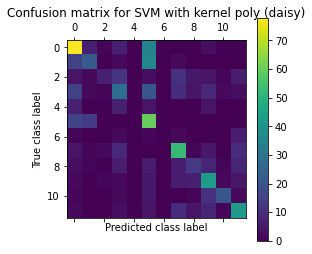



Average Log Loss for  SVM with kernel poly  ( daisy ): 1.535


***************** SVM ******************

classification accuracy for SVM with kernel sigmoid (daisy): 0.5092707045735476
training accuracy for SVM with kernel sigmoid (daisy): 0.6835756263532323

[[88 19  2  8  0 10  0  0  0  4  0  0]
 [ 8 35  0  5  0 25  0  3  0  0  1  0]
 [ 0  2  7  9  0  2  0 17  5 10  1  2]
 [12  5  1 33  0 14  0  9  4 13  2  2]
 [ 3  0  1  9  0  2  0  2  0  3  2  0]
 [16 19  0  3  0 51  0  0  1  0  0  0]
 [ 1  0  1  2  0  0  2  1  2  0  0  3]
 [ 2  0  3  6  0  0  0 61  1  5  0  7]
 [ 0  0  1  4  0  0  1  7 19 12  1  7]
 [ 0  0  2  5  0  0  0  5 13 44  2  2]
 [ 0  0  0  2  0  1  0  0  2  9 28  1]
 [ 2  0  3  2  0  2  0  9  5  7  0 44]]


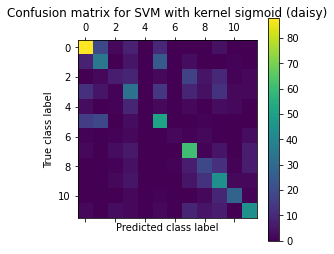



Average Log Loss for  SVM with kernel sigmoid  ( daisy ): 1.388


***************** SVM ******************


ValueError: Precomputed matrix must be a square matrix. Input is a 3233x1700 matrix.

In [9]:
for descriptor_desired in descriptors:
    
    print(f'  {descriptor_desired}  '.center(80,'#'))
    
    with open(filepattern_descriptor_train.format(descriptor_desired), 'rb') as pkl_file_train:
        train_features_from_pkl = pickle.load(pkl_file_train)
    
    print('Number of encoded train images: {}'.format(len(train_features_from_pkl)))
    
    codebook_size = 1700

    clustered_codebook = helpers.createCodebook(train_features_from_pkl, codebook_size=codebook_size)
    
    # encode all train images 
    train_data = []
    train_labels = []

    for image_features in train_features_from_pkl:
        bow_feature_vector = helpers.encodeImage(image_features.data, clustered_codebook)
        train_data.append(bow_feature_vector)
        train_labels.append(image_features.label)
             
    # use a labelencoder to obtain numerical labels
    label_encoder = sklearn.preprocessing.LabelEncoder()
    label_encoder.fit(label_strings)
    train_labels = label_encoder.transform(train_labels)
    
    #Split Train Data for training and validations.
    X_train, X_valid, ytrain, yvalid = train_test_split(train_data, train_labels, test_size=0.2,random_state=42)
    
    print("\nNumber of images for training :",len(X_train))
    print("Number of images for validation :", len(X_valid))

 
    evaluate_models(X_train, X_valid, ytrain, yvalid, descriptor_desired)